<a href="https://colab.research.google.com/github/stories-of-life/COVID19-india/blob/develop/covid19_india_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetch data from Kaggle

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

!mkdir ~/.kaggle
!cp '/content/gdrive/My Drive/kaggle.json' ~/.kaggle
drive.flush_and_unmount()
!ls ~/.kaggle
!kaggle datasets download -d sudalairajkumar/covid19-in-india

Mounted at /content/gdrive
mkdir: cannot create directory ‘/root/.kaggle’: File exists
kaggle.json
covid19-in-india.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
!wget http://biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip

--2020-04-14 12:45:46--  http://biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip
Resolving biogeo.ucdavis.edu (biogeo.ucdavis.edu)... 128.120.228.172
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip [following]
--2020-04-14 12:45:46--  https://biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip [following]
--2020-04-14 12:45:47--  https://data.biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip
Resolving data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)... 128.120.228.172
Connecting to data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14925870 (14M) [application/

# Data Processing

In [19]:
!unzip covid19-in-india.zip -d covid19-in-india
!unzip IND_adm.zip -d IND_adm

Archive:  covid19-in-india.zip
  inflating: covid19-in-india/AgeGroupDetails.csv  
  inflating: covid19-in-india/HospitalBedsIndia.csv  
  inflating: covid19-in-india/ICMRTestingDetails.csv  
  inflating: covid19-in-india/ICMRTestingLabs.csv  
  inflating: covid19-in-india/IndividualDetails.csv  
  inflating: covid19-in-india/StatewiseTestingDetails.csv  
  inflating: covid19-in-india/covid_19_india.csv  
  inflating: covid19-in-india/population_india_census2011.csv  
Archive:  IND_adm.zip
 extracting: IND_adm/IND_adm0.cpg    
  inflating: IND_adm/IND_adm0.csv    
  inflating: IND_adm/IND_adm0.dbf    
  inflating: IND_adm/IND_adm0.prj    
  inflating: IND_adm/IND_adm0.shp    
  inflating: IND_adm/IND_adm0.shx    
 extracting: IND_adm/IND_adm1.cpg    
  inflating: IND_adm/IND_adm1.csv    
  inflating: IND_adm/IND_adm1.dbf    
  inflating: IND_adm/IND_adm1.prj    
  inflating: IND_adm/IND_adm1.shp    
  inflating: IND_adm/IND_adm1.shx    
 extracting: IND_adm/IND_adm2.cpg    
  inflating

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
india_covid19_data=pd.read_csv('covid19-in-india/covid_19_india.csv')
print(india_covid19_data.shape)
print(india_covid19_data.columns)
india_covid19_data.tail()

(926, 9)
Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
921,922,13/04/20,5:00 PM,Telengana,-,-,100,16,562
922,923,13/04/20,5:00 PM,Tripura,-,-,0,0,2
923,924,13/04/20,5:00 PM,Uttarakhand,-,-,5,0,35
924,925,13/04/20,5:00 PM,Uttar Pradesh,-,-,47,5,483
925,926,13/04/20,5:00 PM,West Bengal,-,-,29,7,152


In [0]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

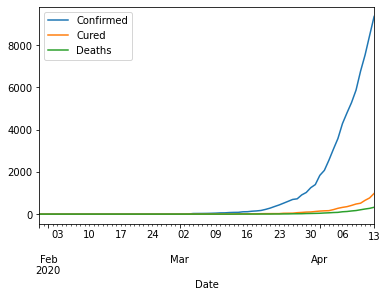

In [16]:
df.groupby(['Date']).sum().reset_index().plot(x='Date',y=['Confirmed','Cured','Deaths'])

# India Map

In [20]:
!pip install pyshp geopandas earthpy

     |████████████████████████████████| 931kB 2.7MB/s 
     |████████████████████████████████| 1.4MB 42.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.7MB 308kB/s 
     |████████████████████████████████| 10.4MB 38.8MB/s 
     |████████████████████████████████| 18.1MB 237kB/s 
  Created wheel for earthpy: filename=earthpy-0.9.1-cp36-none-any.whl size=1365034 sha256=42bd447de9cdecf9da738ff58bd29517d28f50015a95d9fa971181029f1de64a
  Stored in directory: /root/.cache/pip/wheels/19/73/bc/a463e618369ee186e5427252daabcda420b04be3644b2df40f
Successfully built earthpy


In [0]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [57]:
india_map_data = gpd.read_file('IND_adm/IND_adm1.shp')
print(india_map_data.shape)
india_map_data.head()

(36, 10)


,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,105,IND,India,1,Andaman and Nicobar,Union Territor,Union Territory,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,State,State,None,None,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,State,State,None,Agence de la Frontière du Nord-Est(French-obso...,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,State,State,None,None,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,State,State,None,None,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


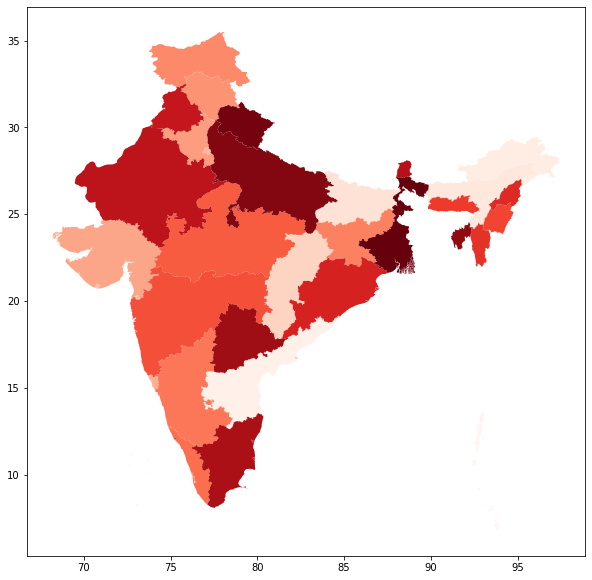

In [58]:
india_map_data.plot(column='NAME_1',categorical=True,figsize=(10,15),cmap='Reds')

# Merging covid and map data

In [111]:
print(india_covid19_data.isna().sum())
print(india_map_data.isna().sum())

Sno                           0
Date                          0
Time                          0
State/UnionTerritory          0
ConfirmedIndianNational       0
ConfirmedForeignNational      0
Cured                         0
Deaths                        0
Confirmed                     0
state_id                    143
dtype: int64
ID_0          0
ISO           0
NAME_0        0
ID_1          0
NAME_1        0
TYPE_1        0
ENGTYPE_1     0
NL_NAME_1    36
VARNAME_1    22
geometry      0
dtype: int64


In [60]:
_print(india_covid19_data.shape)
print(india_map_data.shape)

(926, 9)
(36, 10)


In [61]:
print(india_covid19_data.columns)
print(india_map_data.columns)

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')
Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'TYPE_1', 'ENGTYPE_1',
       'NL_NAME_1', 'VARNAME_1', 'geometry'],
      dtype='object')


In [77]:
states_covid19_data=np.sort(india_covid19_data['State/UnionTerritory'].unique())
print(states_covid19_data)
print(states_covid19_data.shape)

print(np.sort(india_map_data['NAME_1']))
print(india_map_data['NAME_1'].shape)

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Ladakh' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Mizoram'
 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Tamil Nadu'
 'Telengana' 'Tripura' 'Unassigned' 'Uttar Pradesh' 'Uttarakhand'
 'West Bengal']
(33,)
['Andaman and Nicobar' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam'
 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Daman and Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu and Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Orissa' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttaranchal' 'West Bengal']
(36,)


In [140]:
state_id_dict={row['NAME_1']:row['ID_1'] for index,row in india_map_data.iterrows()}
state_id_dict['Andaman and Nicobar Islands']=state_id_dict['Andaman and Nicobar']
state_id_dict['Uttarakhand']=state_id_dict['Uttaranchal']
state_id_dict['Telengana']=state_id_dict['Telangana']
state_id_dict['Odisha']=state_id_dict['Orissa']
state_id_dict['Ladakh']=state_id_dict['Jammu and Kashmir']

print(len(state_id_dict))
state_id_dict

41


{'Andaman and Nicobar': 1,
 'Andaman and Nicobar Islands': 1,
 'Andhra Pradesh': 2,
 'Arunachal Pradesh': 3,
 'Assam': 4,
 'Bihar': 5,
 'Chandigarh': 6,
 'Chhattisgarh': 7,
 'Dadra and Nagar Haveli': 8,
 'Daman and Diu': 9,
 'Delhi': 10,
 'Goa': 11,
 'Gujarat': 12,
 'Haryana': 13,
 'Himachal Pradesh': 14,
 'Jammu and Kashmir': 15,
 'Jharkhand': 16,
 'Karnataka': 17,
 'Kerala': 18,
 'Ladakh': 15,
 'Lakshadweep': 19,
 'Madhya Pradesh': 20,
 'Maharashtra': 21,
 'Manipur': 22,
 'Meghalaya': 23,
 'Mizoram': 24,
 'Nagaland': 25,
 'Odisha': 26,
 'Orissa': 26,
 'Puducherry': 27,
 'Punjab': 28,
 'Rajasthan': 29,
 'Sikkim': 30,
 'Tamil Nadu': 31,
 'Telangana': 32,
 'Telengana': 32,
 'Tripura': 33,
 'Uttar Pradesh': 34,
 'Uttarakhand': 35,
 'Uttaranchal': 35,
 'West Bengal': 36}

In [142]:
india_covid19_data['state_id']=india_covid19_data['State/UnionTerritory'].map(state_id_dict)
india_covid19_data.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
state_id                    3
dtype: int64

In [143]:
india_covid19_data[india_covid19_data['state_id'].isna()]['State/UnionTerritory'].value_counts()

Unassigned    3
Name: State/UnionTerritory, dtype: int64

In [133]:
india_covid19_data.groupby('State/UnionTerritory').mean()['state_id']

State/UnionTerritory
Andaman and Nicobar Islands     1.0
Andhra Pradesh                  2.0
Arunachal Pradesh               3.0
Assam                           4.0
Bihar                           5.0
Chandigarh                      6.0
Chhattisgarh                    7.0
Delhi                          10.0
Goa                            11.0
Gujarat                        12.0
Haryana                        13.0
Himachal Pradesh               14.0
Jammu and Kashmir              15.0
Jharkhand                      16.0
Karnataka                      17.0
Kerala                         18.0
Ladakh                          NaN
Madhya Pradesh                 20.0
Maharashtra                    21.0
Manipur                        22.0
Mizoram                        24.0
Nagaland                       25.0
Odisha                         26.0
Puducherry                     27.0
Punjab                         28.0
Rajasthan                      29.0
Tamil Nadu                     31.0
Telenga

In [134]:
india_map_data['ENGTYPE_1'].value_counts()

State              28
Union Territory     8
Name: ENGTYPE_1, dtype: int64

In [135]:
!wget https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_IND_shp.zip

--2020-04-14 15:35:08--  https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_IND_shp.zip
Resolving biogeo.ucdavis.edu (biogeo.ucdavis.edu)... 128.120.228.172
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_IND_shp.zip [following]
--2020-04-14 15:35:09--  https://data.biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_IND_shp.zip
Resolving data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)... 128.120.228.172
Connecting to data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17520295 (17M) [application/zip]
Saving to: ‘gadm36_IND_shp.zip’

gadm36_IND_shp.zip  100%[===================>]  16.71M  9.76MB/s    in 1.7s    

2020-04-14 15:35:11 (9.76 MB/s) - ‘gadm36_IND_shp.zip’ saved [17520295/17520295]



In [136]:
!unzip gadm36_IND_shp.zip -d gadm36_IND_shp

Archive:  gadm36_IND_shp.zip
 extracting: gadm36_IND_shp/gadm36_IND_0.cpg  
  inflating: gadm36_IND_shp/gadm36_IND_0.dbf  
  inflating: gadm36_IND_shp/gadm36_IND_0.prj  
  inflating: gadm36_IND_shp/gadm36_IND_0.shp  
  inflating: gadm36_IND_shp/gadm36_IND_0.shx  
 extracting: gadm36_IND_shp/gadm36_IND_1.cpg  
  inflating: gadm36_IND_shp/gadm36_IND_1.dbf  
  inflating: gadm36_IND_shp/gadm36_IND_1.prj  
  inflating: gadm36_IND_shp/gadm36_IND_1.shp  
  inflating: gadm36_IND_shp/gadm36_IND_1.shx  
 extracting: gadm36_IND_shp/gadm36_IND_2.cpg  
  inflating: gadm36_IND_shp/gadm36_IND_2.dbf  
  inflating: gadm36_IND_shp/gadm36_IND_2.prj  
  inflating: gadm36_IND_shp/gadm36_IND_2.shp  
  inflating: gadm36_IND_shp/gadm36_IND_2.shx  
 extracting: gadm36_IND_shp/gadm36_IND_3.cpg  
  inflating: gadm36_IND_shp/gadm36_IND_3.dbf  
  inflating: gadm36_IND_shp/gadm36_IND_3.prj  
  inflating: gadm36_IND_shp/gadm36_IND_3.shp  
  inflating: gadm36_IND_shp/gadm36_IND_3.shx  
  inflating: gadm36_IND_shp/lic

In [137]:
india_map_data2 = gpd.read_file('gadm36_IND_shp/gadm36_IND_1.shp')
india_map_data2.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,Andaman & Nicobar Islands|Andaman et Nicobar|I...,None,Union Territor,Union Territory,None,IN.AN,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,IND,India,IND.2_1,Andhra Pradesh,None,None,State,State,None,IN.AP,"MULTIPOLYGON (((80.19264 13.52070, 80.19264 13..."
2,IND,India,IND.3_1,Arunachal Pradesh,Agence de la Frontière du Nord-Est(French-obso...,None,State,State,None,IN.AR,"POLYGON ((94.21111 27.61084, 94.21351 27.60442..."
3,IND,India,IND.4_1,Assam,None,None,State,State,None,IN.AS,"POLYGON ((89.83875 25.96647, 89.83814 25.96793..."
4,IND,India,IND.5_1,Bihar,None,None,State,State,None,IN.BR,"MULTIPOLYGON (((87.26292 27.85072, 87.25249 27..."


In [138]:
india_map_data2['ENGTYPE_1'].value_counts()

State              28
Union Territory     8
Name: ENGTYPE_1, dtype: int64